In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Context

The interstellar medium (ISM) of dense, collapsing netural hydrogen gas has two density regimes that promote thermal pressure stability refered to as the warm and cold neutral mediums (WNM, CNM). In my TORCH simulations, I must initialize a sphere of gas in the CNM density regime surrounded and contained by the lower density WNM. Doing so requires me to pass each simulation cell of gas through to compare with the single-cell heating and cooling data set './hAc_b_2.0E-17_e_0.021_FUV_1.69.dat'.
    
The sinle-cell heating and cooling data is generated by cycling over the full density range of neutral hydrogen (~1e-4 to 1e2 atoms/m^2) and allowing the gas to be heated by external sources such as cosmic rays and cooled by collisional and radiative cooling. Thus, the gas is allowed to find its equilibrium pressure and temperature for each density. The result of this heating/cooling effect produces a phenomenological effect in which the two phases can exist in pressure equilibrium throughout a specific range.
    
Now, I want to allow the user to choose a point within this range and this script will then determine the necessary desnity, Temperature, and size of a given cloud mass. This will make the process of creating numerous initial conditions with varying initial pressures, densities, masses, and heating/cooling physics more streamlined.

In [21]:
ndens_arr = []
pres_arr = []
temp_arr = []
with open('./hAc_b_2.0E-17_e_0.021_FUV_1.69.dat') as fa:
    for line_aa in fa.readlines():
        line_aa = line_aa.strip()
        time, ndens, temp, ei, pres, xHp, muMol, tdust = line_aa.split()
        ndens_arr.append(ndens)
        pres_arr.append(pres)
        temp_arr.append(temp)

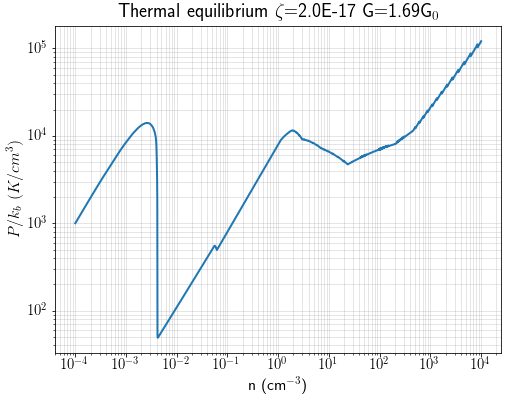

In [24]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rc('text', usetex=True)
plt.title('Thermal equilibrium $\zeta$=2.0E-17 G=1.69G$_0$')
plt.loglog(ndens_arr, pres_arr, lw=2.0)
#plt.xlim(6e-1, 1e3)
#plt.ylim(1e3,2e4)
plt.xlabel("n (cm$^{-3}$)")
plt.ylabel("$P/k_{b}$ $(K/cm^3)$")
plt.grid(which='major', alpha=0.4)
plt.grid(which='minor', alpha=0.4)
#plt.savefig('sean_entire.png')
plt.show()

In [27]:
def DensPresTemp_arr(file_name):
    ndens_arr = []
    pres_arr = []
    temp_arr = []
    with open(file_name) as fa:
        for line_aa in fa.readlines():
            line_aa = line_aa.strip()
            time, ndens, temp, ei, pres, xHp, muMol, tdust = line_aa.split()
            ndens_arr.append(ndens)
            pres_arr.append(pres)
            temp_arr.append(temp)
    return ndens_arr, pres_arr, temp_arr

def FindMaxMin_pres(dens_arr, pres_arr):
    for i,j in enumerate(dens_arr):
        if float(dens_arr[i]) > 1.0:
            low_bound = i
            break
    for k,l in enumerate(dens_arr):
        if float(dens_arr[k]) > 100.0:
            high_bound = k
            break
    pres_truncated = pres_arr[low_bound:high_bound]
    preslist_float = [float(m) for m in pres_truncated]
    pres_floor = min(preslist_float)
    pres_ceiling = max(preslist_float)
    
    return pres_floor, pres_ceiling

In [28]:
ndens_arr, pres_arr, temp_arr = DensPresTemp_arr('./hAc_b_2.0E-17_e_0.021_FUV_1.69.dat')
pres_min, pres_max = FindMaxMin_pres(ndens_arr, pres_arr)

In [40]:
user_choice = np.arange(0.0,1.1,0.1)
pres_choice = np.linspace(pres_min, pres_max, len(user_choice))
print user_choice
print pres_choice

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[  4712.    5396.8   6081.6   6766.4   7451.2   8136.    8820.8   9505.6
  10190.4  10875.2  11560. ]


/Users/sean/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/sean/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/sean/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


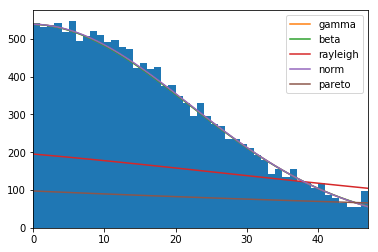

In [41]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 30000
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(y, bins=range(48))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()